In [1]:
#from __future__ import division
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# openCV basics and simple motion detection
### viewing and playing with images

In [9]:
def get_image(path):
    img = cv2.imread(path)
    # img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def show_img(img, title = None):
    scale_factor = 1.2
    plt.figure(figsize=(6*scale_factor,4*scale_factor))
    plt.subplot(111)
    plt.imshow(img, cmap='gray')
    plt.suptitle(title)
    plt.show()
    
def sidebyside(im1,im2, titles = ['img 1','img 2']):
    # Plot two images side by side
    scale_factor = 2.4
    plt.figure(figsize=(6*scale_factor,4*scale_factor))
    
    plt.subplot(1, 2, 1)         # #rows, #cols, plotnumber
    plt.imshow(im1, cmap='gray') # First plot
    plt.title(titles[0])

    plt.subplot(1, 2, 2)         # #rows, #cols, plotnumber
    plt.imshow(im2, cmap='gray') # plot in a separate subplot
    plt.title(titles[1])

    plt.show()
    
def gray_blur(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.GaussianBlur(img, (21, 21), 0)
    return img

def img_diff(img1, img2, threshold = 60):
    gray1 = gray_blur(img1)
    gray2 = gray_blur(img2)
    
    dif = cv2.absdiff(gray1, gray2)
    dif = cv2.threshold(dif, threshold, 255, cv2.THRESH_BINARY)[1]
    
    show_img(dif)

def event_diff(color_list, thresh=15):
    img_list = []          #  Create list of grayed, blurred images
    
    for im in color_list:
        img_list.append(gray_blur(im))
    
    def getdif(im1,im2):
        dif = cv2.absdiff(im1, im2)
        dif = cv2.threshold(dif, thresh, 255, cv2.THRESH_BINARY)[1]
        return dif
    
    # find common changes between an image and the image to the left and right
    # for now ignore first and last image
    for i, im in enumerate(img_list[1:-1]):
        # start w/ img_list[1] thus 'i' == index of the previous image
        prev = getdif(im, img_list[i])
        post = getdif(im, img_list[i+2])
        both = cv2.bitwise_and(prev,post)
        
#         show_img(prev, title= 'prev')
#         show_img(post, title= 'post')

#         show_img(both, title='image at index '+str(i+1))
        sidebyside(both, color_list[i+1], titles = ['motion','original'])

### Mossy the dog

In [ ]:
mossy = get_image('../images/mossydeer.jpg')
nomossy = get_image('../images/nomossy.jpg')
bgr_mossy = cv2.cvtColor(mossy, cv2.COLOR_RGB2BGR)
gray_mossy = cv2.cvtColor(mossy, cv2.COLOR_RGB2GRAY)

In [ ]:
# show_img(mossy,)
# show_img(nomossy)

# img_diff(mossy, nomossy)

sidebyside(mossy, nomossy)

# # show_img(bgr_mossy)
# # show_img(gray_mossy, title = 'gray mossy?', cmap='gray')

# # show_img(mossy - nomossy)
# # show_img((mossy + nomossy)/2)
# # show_img(mossy-((mossy + nomossy)/2))

### Playing with deer images

In [3]:
deer1 = get_image('../data/motion_test/EK000025-2.JPG')
deer2 = get_image('../data/motion_test/EK000026-2.JPG')
deer3 = get_image('../data/motion_test/EK000027-2.JPG')

gray1 = cv2.cvtColor(deer1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(deer2, cv2.COLOR_RGB2GRAY)
gray3 = cv2.cvtColor(deer3, cv2.COLOR_RGB2GRAY)

blur1 = cv2.GaussianBlur(gray1, (21, 21), 0)
blur2 = cv2.GaussianBlur(gray2, (21, 21), 0)
blur3 = cv2.GaussianBlur(gray3, (21, 21), 0)

# floor_avg= (deer1+deer2+deer3)//3
# avg_deer = (deer1+deer2+deer3)/3.0
# geomean = geo_mean([gray1, gray2, gray3])

# roundeer1 = np.around(deer1, -2)
# rd2 = np.around(deer2, -2)
# rd3 = np.around(deer3, -2)
# ravg = (roundeer1 + rd2 + rd3)/3

In [ ]:
# show_img(deer1)
# show_img(deer2)
# show_img(deer3)

# img_diff(deer2, deer1, threshold = 20)
# img_diff(deer2, deer3, threshold = 20)

################
event = [deer1, deer2, deer3]
event_diff(event, thresh = 5)

# event_diff(event, thresh = 3)
# event_diff(event, thresh = 15)


################
# event = [deer2, deer1, deer3]
# event_diff(event, thresh = 10)


################
# event = [deer2, deer3, deer1]
# event_diff(event, thresh = 15)

## Larger image groups

In [4]:
data_dir = "../data/second_sample/BC Kettles/Site 1/"
for root, dirs, files in os.walk(data_dir):
#     for name in files:
#         print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

../data/second_sample/BC Kettles/Site 1/April 2015
../data/second_sample/BC Kettles/Site 1/February 2015
../data/second_sample/BC Kettles/Site 1/January 2015
../data/second_sample/BC Kettles/Site 1/March 2015


In [5]:
event_bunch = []
for dr in os.listdir(data_dir)[1:]:
    ev = [get_image(os.path.join(data_dir, dr, im)) for im in os.listdir(os.path.join(data_dir, dr))]
    event_bunch.append(ev)
    
    

In [6]:
len(event_bunch)

4

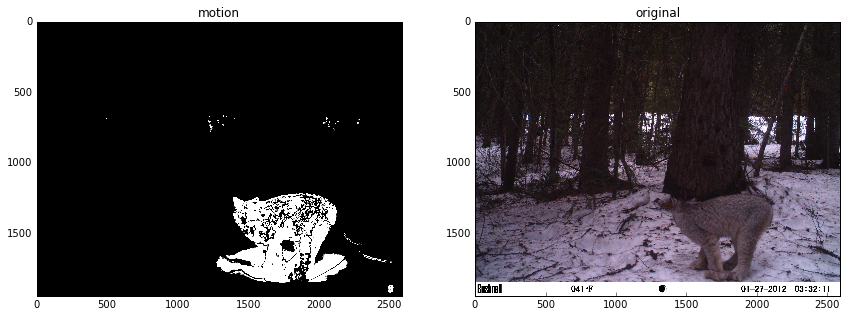

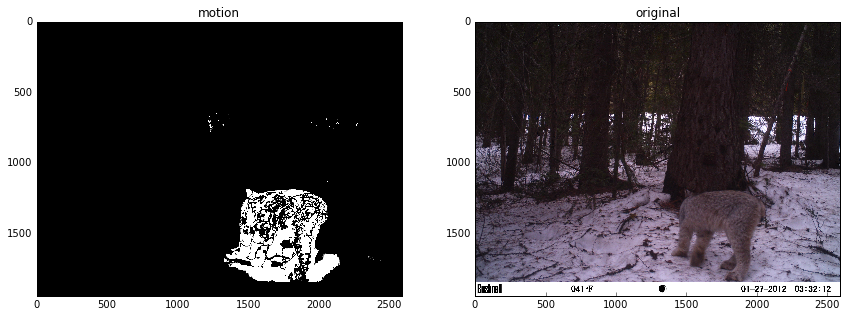

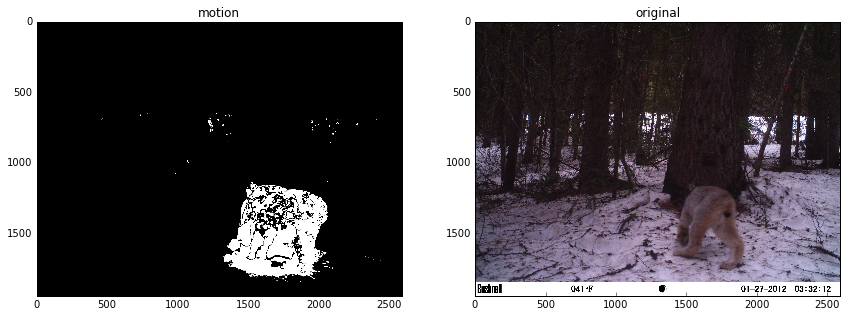

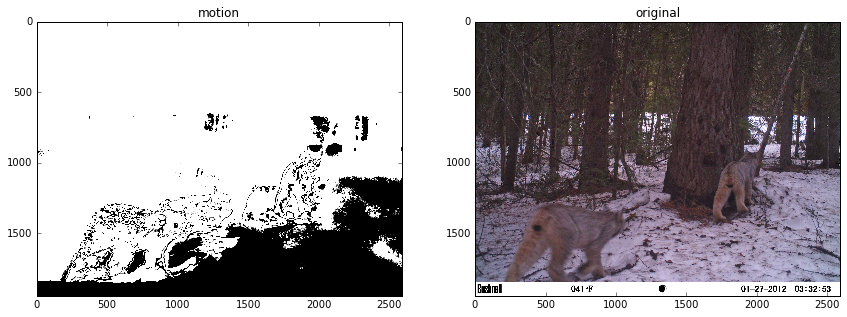

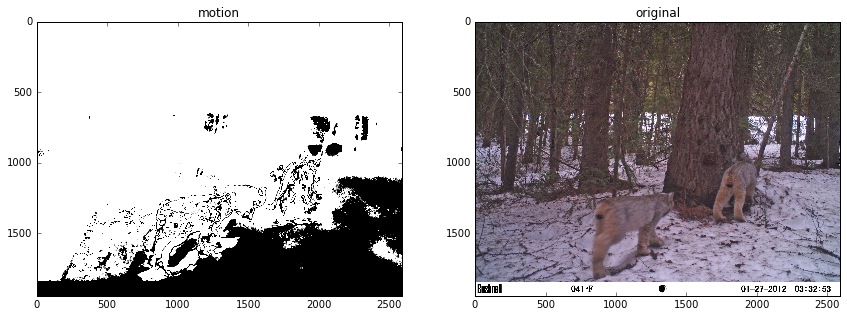

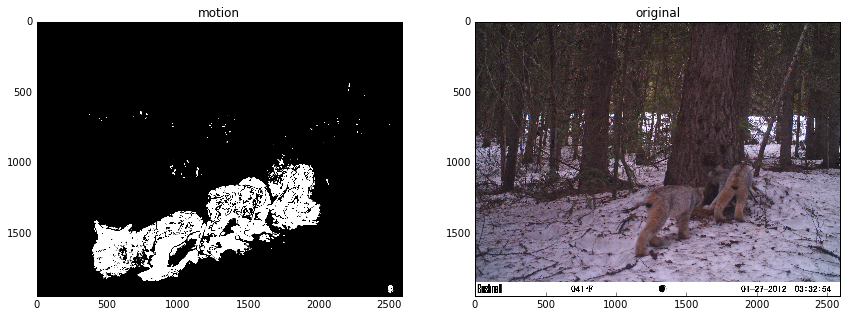

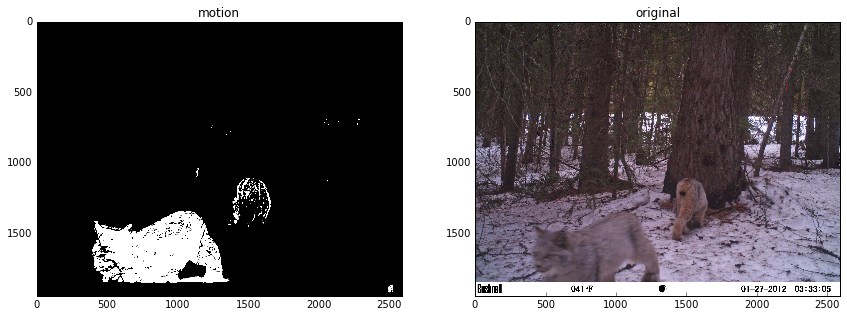

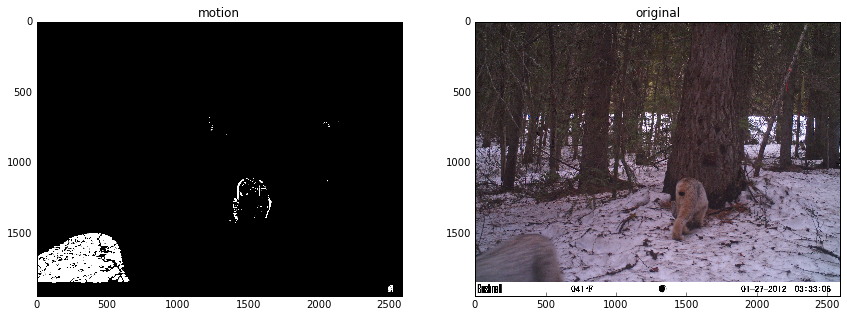

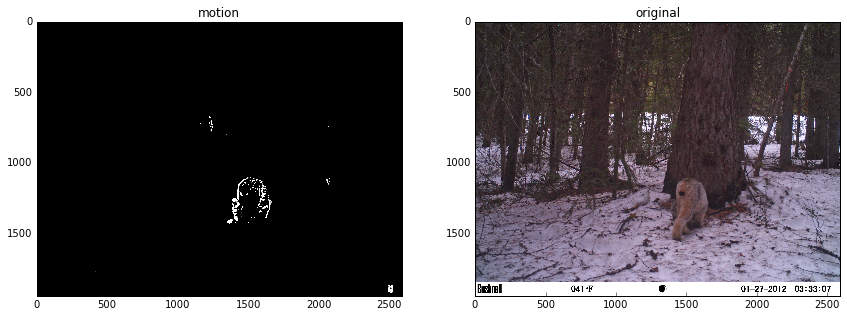

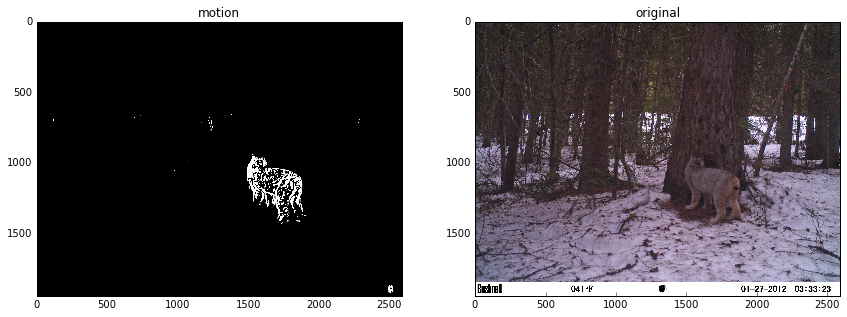

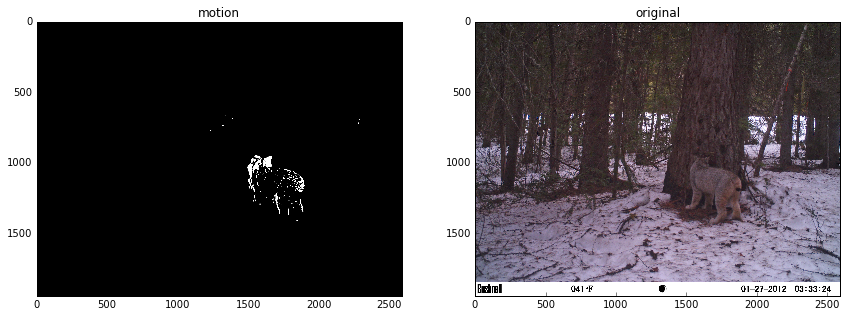

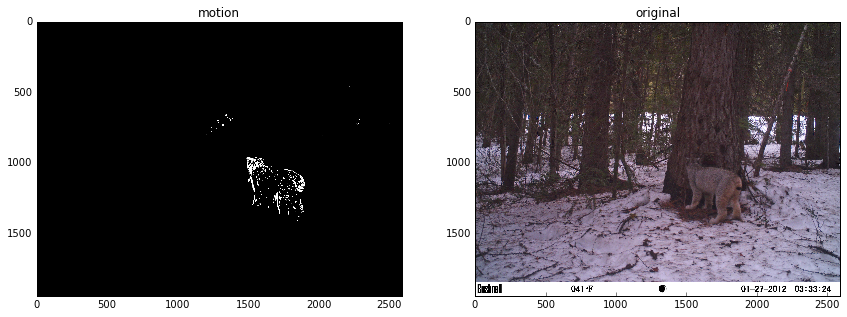

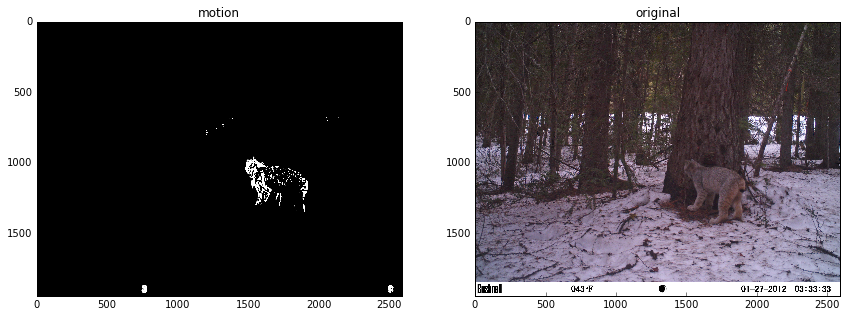

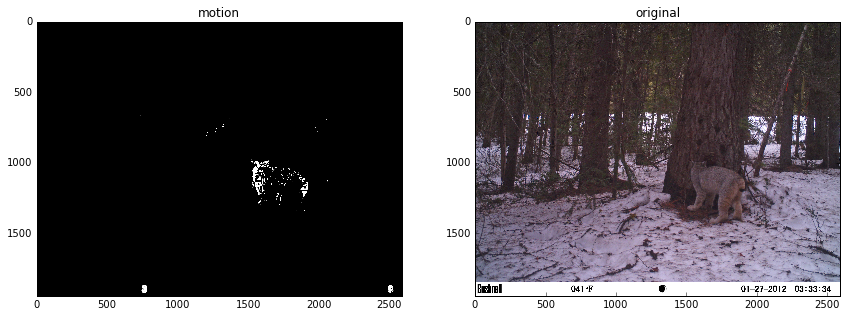

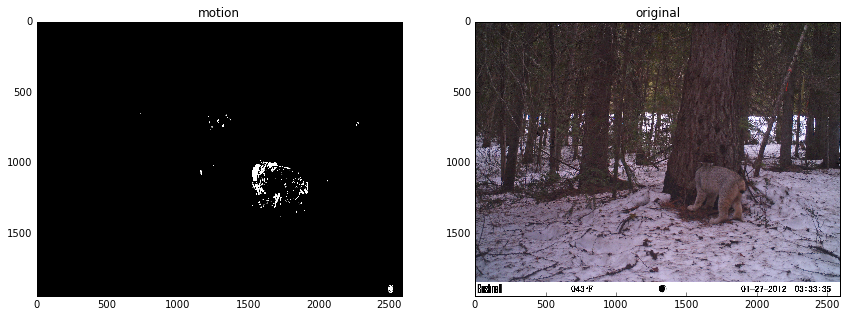

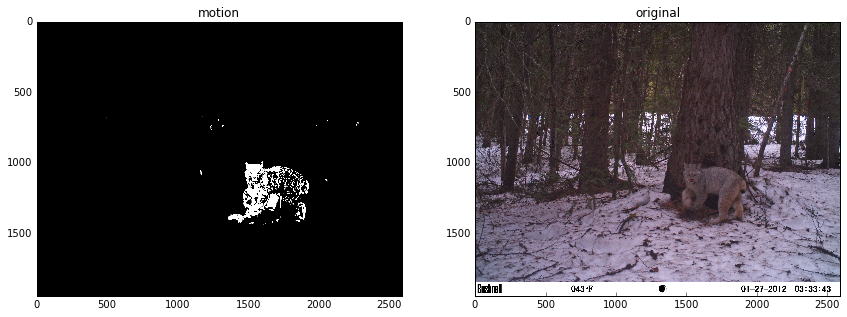

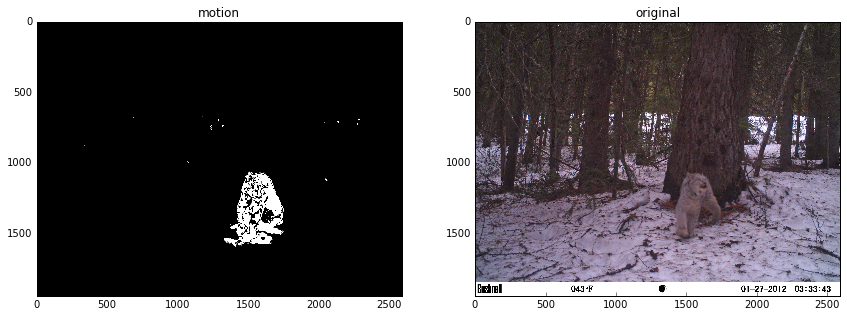

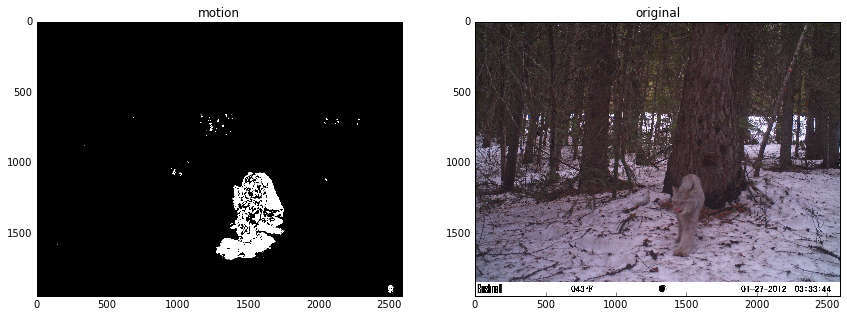

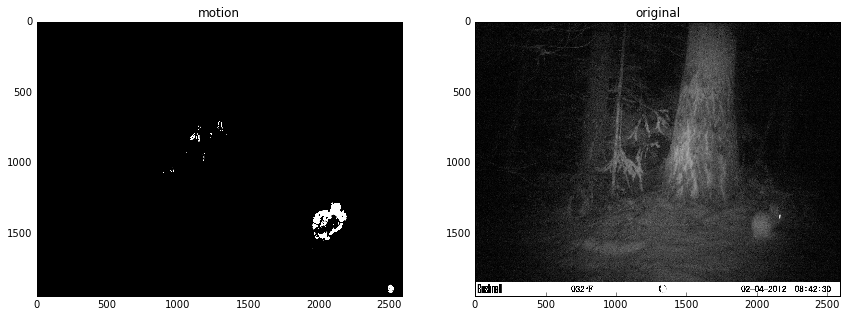

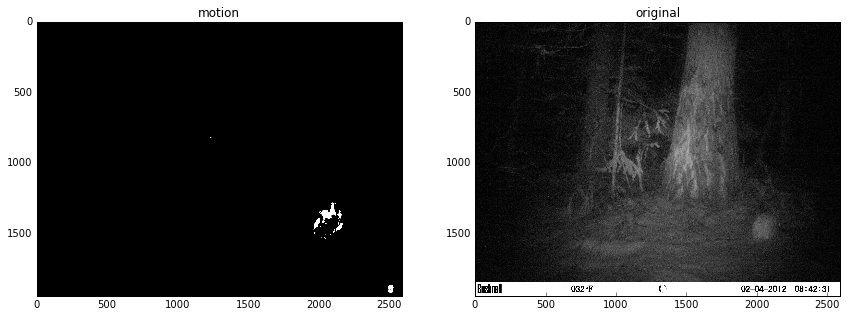

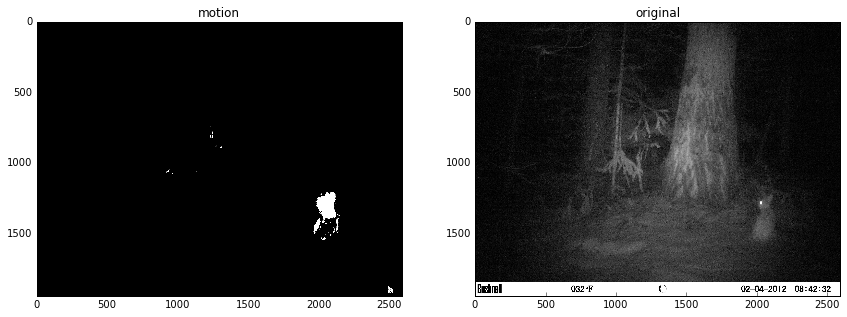

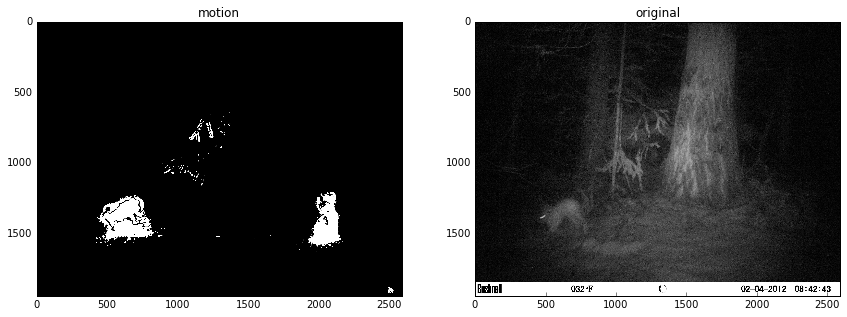

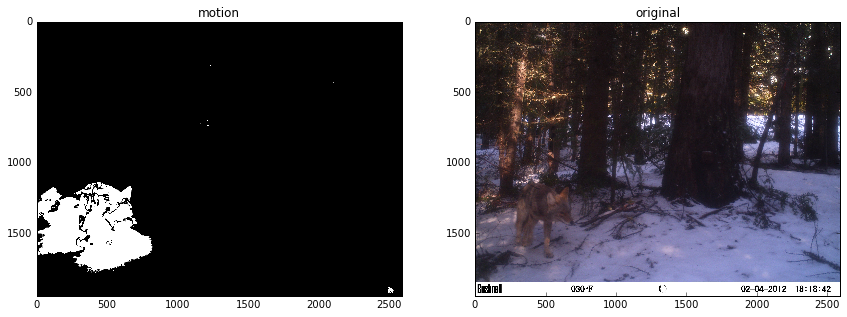

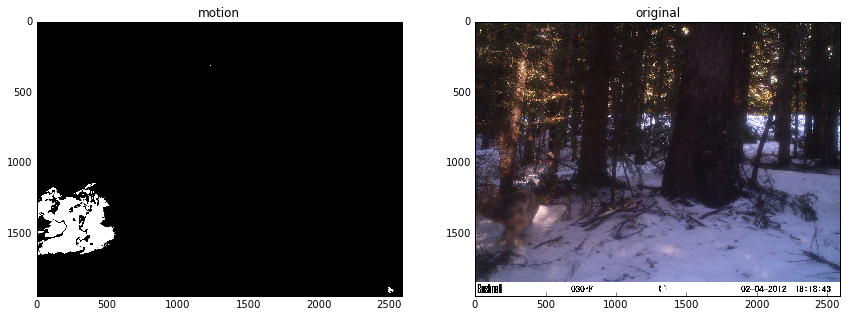

In [10]:
ev = event_bunch[0]
event_diff(ev, thresh=5)

# Background Subtraction References:

### Borrowed from:
#### http://www.pyimagesearch.com/2015/05/25/basic-motion-detection-and-tracking-with-python-and-opencv/#

```python

# loop over the frames of the video
while True:
	# grab the current frame and initialize the occupied/unoccupied
	# text
	(grabbed, frame) = camera.read()
	text = "Unoccupied"
 
	# if the frame could not be grabbed, then we have reached the end
	# of the video
	if not grabbed:
		break
 
	# resize the frame, convert it to grayscale, and blur it
	frame = imutils.resize(frame, width=500)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	gray = cv2.GaussianBlur(gray, (21, 21), 0)
 
	# if the first frame is None, initialize it
	if firstFrame is None:
		firstFrame = gray
		continue

	# compute the absolute difference between the current frame and
	# first frame
	frameDelta = cv2.absdiff(firstFrame, gray)
	thresh = cv2.threshold(frameDelta, 25, 255, cv2.THRESH_BINARY)[1]
 
	# dilate the thresholded image to fill in holes, then find contours
	# on thresholded image
	thresh = cv2.dilate(thresh, None, iterations=2)
	(cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
 
	# loop over the contours
	for c in cnts:
		# if the contour is too small, ignore it
		if cv2.contourArea(c) < args["min_area"]:
			continue
 
		# compute the bounding box for the contour, draw it on the frame,
		# and update the text
		(x, y, w, h) = cv2.boundingRect(c)
		cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
		text = "Occupied"
        
```

## subtracting weighted average
### borrowed from http://opencvpython.blogspot.com/2012/07/background-extraction-using-running.html

This code demonstrates extracting image background with a weighted avg
Can I subtract this extracted background to detect motion regions?

```python
import cv2
import numpy as np
 
c = cv2.VideoCapture(0)
_,f = c.read()
 
avg1 = np.float32(f)
avg2 = np.float32(f)
 
while(1):
    _,f = c.read()
     
    cv2.accumulateWeighted(f,avg1,0.1)
    cv2.accumulateWeighted(f,avg2,0.01)
     
    res1 = cv2.convertScaleAbs(avg1)
    res2 = cv2.convertScaleAbs(avg2)
 
    cv2.imshow('img',f)
    cv2.imshow('avg1',res1)
    cv2.imshow('avg2',res2)
    k = cv2.waitKey(20)
 
    if k == 27:
        break
 
cv2.destroyAllWindows()
c.release()
```